 ***Data is provided by Datafiniti's Product Database.***
 <a href="https://datafiniti.co/products/product-data/"> Datafiniti's Product Database</a>
 
<a href="https://data.world/datafiniti/electronic-products-and-pricing-data">Data-Source </a>

<a href="https://developer.datafiniti.co/docs/product-data-schema">Data-Schema </a>

<a href="https://www.kaggle.com/datasets/datafiniti/electronic-products-prices">Kaggle </a>

 <span style='color:green'>MUKSANA KHATUN</span>
 
 <span style='color:green'>28/10/2022</span>


<a id="clean2"></a>
<h2>   
      <font color = green >
            <span style='font-family:Georgia'>
            Introduction
            </span>   
        </font>    
</h2>

This case study aims to give an idea of applying EDA in a real E-Commerce business. In this case study, we will....

### Getting Jupyter Ready ###

In [1]:
#importing all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import re
import numpy as np

In [2]:
# setting up plot style 
#style.use('fivethirtyeight')
#style.use('ggplot')
style.use('seaborn-poster')
#sns.color_palette("light:#5A9", as_cmap=True)
sns.color_palette("flare")

[(0.9155979, 0.55210684, 0.42070204),
 (0.888292, 0.40830288, 0.36223756),
 (0.81942908, 0.28911553, 0.38102921),
 (0.69226314, 0.23413578, 0.42480327),
 (0.56041794, 0.19845221, 0.44207535),
 (0.42355299, 0.16934709, 0.42581586)]

In [3]:
params = {
    'axes.labelsize': 13,
    'axes.titlesize': 17,
    'font.size': 16,
    'legend.fontsize': 8, 
    'xtick.labelsize': 12,
    'ytick.labelsize': 15,
    'font.family': 'cursive',
}
plt.rcParams.update(params)

In [4]:
#Setting the display option to max 400 as our dataset has more than 20 column and it will be hard to see all those with default value
pd.options.display.width = 0
pd.set_option('display.max_columns', 400)
pd.set_option('display.max_rows',400)

### Reading & Understanding the data ###

In [5]:
# reading csv file in the notebook
eppd = pd.read_csv('DatafinitiElectronicsProductsPricingData.csv')
eppd.head(2)

,id,prices.amountMax,prices.amountMin,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.shipping,prices.sourceURLs,asins,brand,categories,dateAdded,dateUpdated,ean,imageURLs,keys,manufacturer,manufacturerNumber,name,primaryCategories,sourceURLs,upc,weight,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,AVphzgbJLJeJML43fA0o,104.99,104.99,Yes,New,USD,"2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017...",False,Bestbuy.com,NaN,http://www.bestbuy.com/site/sanus-tv-wall-moun...,B00C78VIUE,Sanus,"Audio & Video Accessories,TV Mounts,TV Accesso...",2015-04-13T12:00:51Z,2018-05-12T18:59:48Z,NaN,https://images-na.ssl-images-amazon.com/images...,sanusvlf410b110inchsuperslimfullmotionmountfor...,NaN,VLF410B1,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Electronics,https://www.amazon.com/Sanus-VLF410B1-10-Inch-...,7.94E+11,32.8 pounds,NaN,NaN,NaN,NaN,NaN
1,AVpgMuGwLJeJML43KY_c,69.00,64.99,In Stock,New,USD,2017-12-14T06:00:00Z,True,Walmart.com,Expedited,https://www.walmart.com/ip/BOYTONE-BT210FB-BLA...,"B018K251JE,B00VILQKQ8",Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2018-06-13T19:39:02Z,NaN,https://images-na.ssl-images-amazon.com/images...,boytone2500w21chhometheatersystemblackdiamond/...,Boytone,BT-210F,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds,NaN,NaN,NaN,NaN,NaN


In [6]:
eppd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7249 entries, 0 to 7248
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   7249 non-null   object 
 1   prices.amountMax     7249 non-null   float64
 2   prices.amountMin     7249 non-null   float64
 3   prices.availability  7249 non-null   object 
 4   prices.condition     7249 non-null   object 
 5   prices.currency      7249 non-null   object 
 6   prices.dateSeen      7249 non-null   object 
 7   prices.isSale        7249 non-null   bool   
 8   prices.merchant      7249 non-null   object 
 9   prices.shipping      4277 non-null   object 
 10  prices.sourceURLs    7249 non-null   object 
 11  asins                7249 non-null   object 
 12  brand                7249 non-null   object 
 13  categories           7249 non-null   object 
 14  dateAdded            7249 non-null   object 
 15  dateUpdated          7249 non-null   o

In [7]:
eppd.describe()

,prices.amountMax,prices.amountMin,Unnamed: 28
count,7249.000000,7249.000000,6.000000e+00
mean,495.530610,463.963005,8.850000e+11
std,763.599387,680.504507,0.000000e+00
min,1.000000,1.000000,8.850000e+11
25%,79.990000,79.950000,8.850000e+11
50%,198.990000,189.990000,8.850000e+11
75%,494.990000,479.990000,8.850000e+11
max,6999.990000,5999.990000,8.850000e+11




<a id="clean2"></a>
<h2>   
      <font color = green >
            <span style='font-family:Georgia'>
            Data Cleaning & Manipulation
            </span>   
        </font>    
</h2>

**Null Value Data Imputation & Null value calculation**

In [8]:
# total number of null values in each column
eppd.isnull().sum() 

id                        0
prices.amountMax          0
prices.amountMin          0
prices.availability       0
prices.condition          0
prices.currency           0
prices.dateSeen           0
prices.isSale             0
prices.merchant           0
prices.shipping        2972
prices.sourceURLs         0
asins                     0
brand                     0
categories                0
dateAdded                 0
dateUpdated               0
ean                    5706
imageURLs                 0
keys                      0
manufacturer           4014
manufacturerNumber        0
name                      0
primaryCategories         0
sourceURLs                0
upc                       0
weight                    0
Unnamed: 26            7210
Unnamed: 27            7231
Unnamed: 28            7243
Unnamed: 29            7237
Unnamed: 30            7243
dtype: int64

In [9]:
# % null value in each column
round(eppd.isnull().sum() / eppd.shape[0] * 100.00,2)
null_eppd = pd.DataFrame((eppd.isnull().sum())*100/eppd.shape[0]).reset_index()
null_eppd.columns = ['Column Name', 'Null Values Percentage']

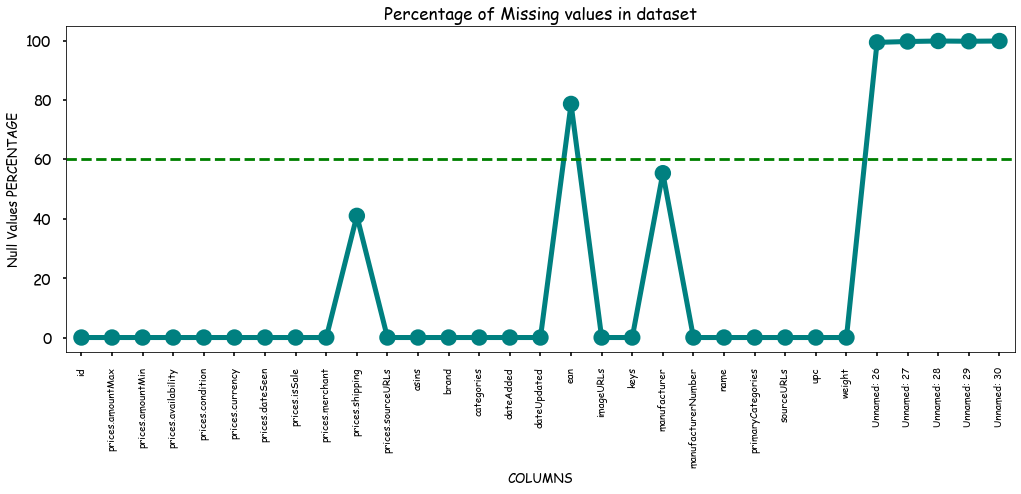

In [10]:
# more than or equal to 60% empty rows columns
fig = plt.figure(figsize=(17,6))
ax = sns.pointplot(x="Column Name",y="Null Values Percentage",
                   data=null_eppd,color='teal')
plt.xticks(rotation =90,fontsize =10)
ax.axhline(60, ls='--',color='green')
plt.title("Percentage of Missing values in dataset")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

In [11]:
# name of the columns which has more than 60% null values
nullcol_eppd = null_eppd[null_eppd["Null Values Percentage"]>=60]
nullcol_eppd

,Column Name,Null Values Percentage
16,ean,78.714305
26,Unnamed: 26,99.461995
27,Unnamed: 27,99.751690
28,Unnamed: 28,99.917230
29,Unnamed: 29,99.834460
30,Unnamed: 30,99.917230


<div class="alert alert-block alert-success"><b>insight: </b>Some of the columns has null values more than 60% in this dataframe </div>

### Deleting Unnecessary Columns & creating new columns in dataframe ###

In [12]:
# create a list of columns that needs to be dropped including the columns with >60% null values
Unwanted_eppd = nullcol_eppd["Column Name"].tolist()+ ['upc','imageURLs'] 
len(Unwanted_eppd)

8

In [13]:
# Dropping the unnecessary columns from eppd
df = eppd.drop(['upc','imageURLs','ean','Unnamed: 26','Unnamed: 27','Unnamed: 28','Unnamed: 29','Unnamed: 30'], axis=1)
# Inspecting the dataframe after removal of unnecessary columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7249 entries, 0 to 7248
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   7249 non-null   object 
 1   prices.amountMax     7249 non-null   float64
 2   prices.amountMin     7249 non-null   float64
 3   prices.availability  7249 non-null   object 
 4   prices.condition     7249 non-null   object 
 5   prices.currency      7249 non-null   object 
 6   prices.dateSeen      7249 non-null   object 
 7   prices.isSale        7249 non-null   bool   
 8   prices.merchant      7249 non-null   object 
 9   prices.shipping      4277 non-null   object 
 10  prices.sourceURLs    7249 non-null   object 
 11  asins                7249 non-null   object 
 12  brand                7249 non-null   object 
 13  categories           7249 non-null   object 
 14  dateAdded            7249 non-null   object 
 15  dateUpdated          7249 non-null   o

In [14]:
df.sample(2)

,id,prices.amountMax,prices.amountMin,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.shipping,prices.sourceURLs,asins,brand,categories,dateAdded,dateUpdated,keys,manufacturer,manufacturerNumber,name,primaryCategories,sourceURLs,weight
7094,AV13M7AH-jtxr-f38GAZ,249.00,119.99,In Stock,New,USD,"2017-11-12T12:00:00Z,2017-11-04T09:00:00Z",True,Audiosavings,Value,https://www.walmart.com/ip/M-Audio-HDH-50/1686...,B00F3F7316,M-Audio,"Over-Ear and On-Ear Headphones,DJ Equipment,El...",2017-07-25T00:44:22Z,2018-06-13T19:39:26Z,"694318014950,maudio/hdh50,maudiooverearheadpho...",NaN,HDH-50,M-Audio - Over-the-Ear Headphones - Black,Electronics,http://www.ebay.com/itm/M-Audio-HDH50-High-Def...,0.56 pounds
5477,AVpf-2hGilAPnD_xlfDv,1099.99,1099.99,Yes,New,USD,2017-08-19T08:00:00Z,False,Bestbuy.com,NaN,https://www.bestbuy.com/site/products/5230000.p,B01EIUJPS0,Apple,"Computers,Shop Laptops by Type,Computers & Acc...",2016-05-25T05:00:45Z,2018-05-16T20:25:06Z,applemacbook12corem58gbram512gbflashstorageeng...,Apple,MMGM2LL/A,Apple MacBook - 12 - Core m5 - 8 GB RAM - 512 ...,Electronics,http://www.cdw.com/shop/products/Apple-MacBook...,2.03 lb


<div class="alert alert-block alert-success"><b>insight: </b> unwanted columns has been droped from the dataframe. </div>

### Data Type Conversion and tranforming data ###

In [15]:
#from the dateseen columns new column has been generated called time_seen
times_seen=[]
for i in df['prices.dateSeen']:
    time_= i.split(",")
    times_seen.append(len(time_))

df['times_seen'] = times_seen
df['prices.dateSeen'] = df['prices.dateSeen'].apply(lambda x: x.split(",")[0])

In [16]:
#convert date with date time features, currently it is in string type
df['prices.dateSeen'] = pd.to_datetime(df['prices.dateSeen'])
df['dateAdded'] = pd.to_datetime(df['dateAdded'])
df['dateUpdated'] = pd.to_datetime(df['dateUpdated'])

In [17]:
#Generate date level feature such as day, month, week, month name etc.
df['Day'] = df['prices.dateSeen'].dt.day
df['Month'] = df['prices.dateSeen'].dt.month
df['Year'] = df['prices.dateSeen'].dt.year
df['Week'] = df['prices.dateSeen'].dt.week
df['Month_Name'] = df['prices.dateSeen'].dt.strftime('%B')
df['Day_Name'] = df['prices.dateSeen'].dt.strftime('%A')
df['Formatted_date'] = pd.to_datetime(df['prices.dateSeen'].dt.date)

C:\Users\User\AppData\Local\Temp\ipykernel_6168\1932260276.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['Week'] = df['prices.dateSeen'].dt.week


In [18]:
df['prices.currency'].unique()

array(['USD', 'CAD'], dtype=object)

In [19]:
#from the sourceurl marchant name is extracted
df['prices.sourceURLs'].str.split('.').str[1]
df['marchant_name']=df['prices.sourceURLs'].str.split('.').str[1]

In [20]:
#1 USD = 1.2978 CAD
# all values in price is converted to same unit
for rownumber in range(len(df['prices.currency'])):
     if df['prices.currency'][rownumber] == "CAD":
            df['prices.amountMax'][rownumber] = df['prices.amountMax'][rownumber] / 1.2978
            df['prices.amountMin'][rownumber] = df['prices.amountMin'][rownumber] / 1.2978


C:\Users\User\AppData\Local\Temp\ipykernel_6168\456749821.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prices.amountMax'][rownumber] = df['prices.amountMax'][rownumber] / 1.2978
C:\Users\User\AppData\Local\Temp\ipykernel_6168\456749821.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prices.amountMin'][rownumber] = df['prices.amountMin'][rownumber] / 1.2978


In [21]:
#Renaming the column name
df.rename(columns={'prices.amountMax':'Actual_price',
'prices.amountMin':'Discount_price',
'prices.availability':'Product_availability',
'prices.condition':'Condition',
'prices.currency':'Currency',
'prices.isSale':'Sale_or_not',
'prices.merchant':'merchant',
'prices.dateSeen':'Date',
'prices.shipping':'shipping'
},inplace=True)

In [22]:
#percentage of sales is calculated
df['percentage_of_sales']=round(((df['Actual_price']-df['Discount_price'])/df['Actual_price'])*100,2)

In [23]:
df.Product_availability.unique()# yes ,no,special

array(['Yes', 'In Stock', 'TRUE', 'undefined', 'yes', 'Out Of Stock',
       'Special Order', 'No', 'More on the Way', 'sold', 'FALSE',
       'Retired', '32 available', '7 available'], dtype=object)

In [24]:
#new catagorial columns is genetrated using string contain function
df.loc[df['Product_availability'].str.contains('Yes|TRUE|In Stock|yes|available|32 available|7 available',
                                               flags=re.IGNORECASE)==True,'availavility']='yes'
df.loc[df['Product_availability'].str.contains('No|sold|FALSE|Retired|Discontinued|Out Of Stock|undefined',
                                               flags=re.IGNORECASE)==True,'availavility']='No'
df.loc[df['Product_availability'].str.contains('Special Order|More on the Way|More Coming Soon',
                                               flags=re.IGNORECASE)==True,'availavility']='time_needed'

In [25]:
df.availavility.value_counts()

yes            6866
time_needed     200
No              183
Name: availavility, dtype: int64

In [26]:
#new catagorial columns is genetrated using string contain function
df.loc[df['Condition'].str.contains('new|New|Brand New|New other (see details)',
                                           flags=re.IGNORECASE) == True,"condition"] = 'New'
df.loc[df['Condition'].str.contains('refurbished|Seller refurbished|Manufacturer refurbished|Refurbished',
                                           flags=re.IGNORECASE) == True,"condition"] = 'Refurbished'
df.loc[df['Condition'].str.contains('pre-owned|used',
                                           flags=re.IGNORECASE) == True,"condition"] = 'Used'

C:\Users\User\AppData\Local\Temp\ipykernel_6168\3383550079.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df.loc[df['Condition'].str.contains('new|New|Brand New|New other (see details)',


In [27]:
df.condition.value_counts()

New            7020
Used            146
Refurbished      83
Name: condition, dtype: int64

In [28]:
#new catagorial columns is genetrated using string contain function
df.loc[df['shipping'].str.contains('Free Shipping|Free Shipping for this Item|FREE|Free Standard Shipping|Free Delivery|Free Expedited Shipping',
                                               flags=re.IGNORECASE)==True,'shipping_price']='free'
df.loc[df['shipping'].str.contains('Free Standard Shipping on Orders Over $49|Free Next Day Delivery (USA)|Free Shippingon orders 35 and up|Free Expedited Shipping for most orders over $49',
                                               flags=re.IGNORECASE)==True,'shipping_price']='condition_applied'
df.loc[df['shipping'].str.contains('Shipping Charges Apply|USD|CAD',
                                               flags=re.IGNORECASE)==True,'shipping_price']='additional_money_needed'
df.loc[df['shipping'].str.contains('nan',flags=re.IGNORECASE)==True,'shipping_price']= np.nan
df.loc[df['shipping'].str.contains('Freight|Expedited|Standard|Value',flags=re.IGNORECASE)==True,'shipping_price']='standard_payment'


C:\Users\User\AppData\Local\Temp\ipykernel_6168\3741687616.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df.loc[df['shipping'].str.contains('Free Standard Shipping on Orders Over $49|Free Next Day Delivery (USA)|Free Shippingon orders 35 and up|Free Expedited Shipping for most orders over $49',


In [29]:
df.shipping_price.value_counts()

standard_payment           3362
free                        830
additional_money_needed      69
condition_applied            16
Name: shipping_price, dtype: int64

In [30]:
#new catagorial columns is genetrated using string contain function
df.loc[df['categories'].str.contains('TV',flags=re.IGNORECASE)==True,'sub_categories']='tv'
df.loc[df['categories'].str.contains('Mobile',flags=re.IGNORECASE)==True,'sub_categories']='mobile'
df.loc[df['categories'].str.contains('Mobile Devices| Charger|Protector',flags=re.IGNORECASE)==True,'sub_categories']='mobile_accesories'
df.loc[df['categories'].str.contains('Soundbar|Speakers|Amplifier|Headphones|Headset|Subwoofer|Woofer| Audio',
                                     flags=re.IGNORECASE)==True,'sub_categories']= 'sound_system'
df.loc[df['categories'].str.contains('Camera|Action Cam|Lens',flags=re.IGNORECASE)==True,'sub_categories']='camera'
df.loc[df['categories'].str.contains('Hard Drive|SSD|Keyboard Cover|Retail Kit|Video adapter',flags=re.IGNORECASE)==True,'sub_categories']='laptop_accerories'
df.loc[df['categories'].str.contains('MacBook',flags=re.IGNORECASE)==True,'sub_categories']='MacBook'
df.loc[df['categories'].str.contains('DVD/DM Receiver |Disc Player',flags=re.IGNORECASE)==True,'sub_categories']='dvd_player'
df.loc[df['categories'].str.contains('Gaming|Streaming Player',flags=re.IGNORECASE)==True,'sub_categories']='gaming_producyts'
df.loc[df['categories'].str.contains('Theater Receiver',flags=re.IGNORECASE)==True,'sub_categories']='theater'
df.loc[df['categories'].str.contains('Cooler',flags=re.IGNORECASE)==True,'sub_categories']='cooler'
df.loc[df['categories'].str.contains('Modem Router',flags=re.IGNORECASE)==True,'sub_categories']='router'
df.loc[df['categories'].str.contains('In-Car Wi-Fi and Vehicle Monitoring Device',flags=re.IGNORECASE)==True,'sub_categories']='car_monitor'
df.loc[df['categories'].str.contains('laptop',flags=re.IGNORECASE)==True,'sub_categories']='laptop'

In [31]:
df.sub_categories.value_counts()

sound_system         3189
camera                902
laptop                758
laptop_accerories     462
tv                    411
gaming_producyts      220
theater               206
mobile_accesories      90
dvd_player             61
router                 47
mobile                 46
cooler                 37
MacBook                22
Name: sub_categories, dtype: int64

In [32]:
#checking for null values
df.sub_categories.isnull().sum()

798

In [33]:
df.primaryCategories.value_counts()

Electronics              7196
 Apple CarPlay             27
 Intel Celeron             12
Electronics,Furniture       8
 Siri Eyes Free             6
Name: primaryCategories, dtype: int64

In [34]:
#Drop date column as we have extracted all the date features
df.drop(columns=['asins','keys','sourceURLs','manufacturerNumber','weight'],inplace=True)

<div class="alert alert-block alert-success"><b>insight: </b> few catagorial columns has been created from text columns. also unwanted columns is dorped.</div>


<a id="clean2"></a>
<h2>   
      <font color = green >
            <span style='font-family:Georgia'>
            Data Analysis
            </span>   
        </font>    
</h2>

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7249 entries, 0 to 7248
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   id                    7249 non-null   object             
 1   Actual_price          7249 non-null   float64            
 2   Discount_price        7249 non-null   float64            
 3   Product_availability  7249 non-null   object             
 4   Condition             7249 non-null   object             
 5   Currency              7249 non-null   object             
 6   Date                  7249 non-null   datetime64[ns, UTC]
 7   Sale_or_not           7249 non-null   bool               
 8   merchant              7249 non-null   object             
 9   shipping              4277 non-null   object             
 10  prices.sourceURLs     7249 non-null   object             
 11  brand                 7249 non-null   object             
 12  catego

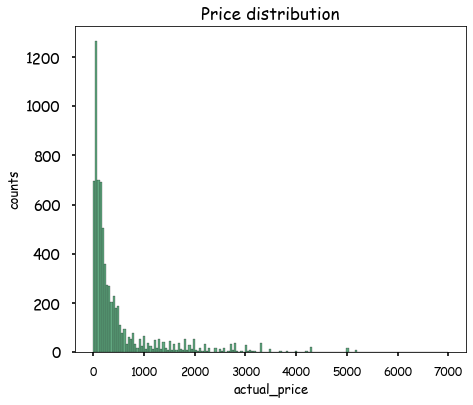

In [36]:
plt.figure(figsize = (7,6))
sns.histplot(data=df, x="Actual_price", color='seagreen')
plt.title('Price distribution')
plt.xlabel('actual_price')
plt.ylabel('counts')
plt.show()

<div class="alert alert-block alert-success"><b>insight: </b>overall price for the products are spreaded from 0-1000 usd</div>

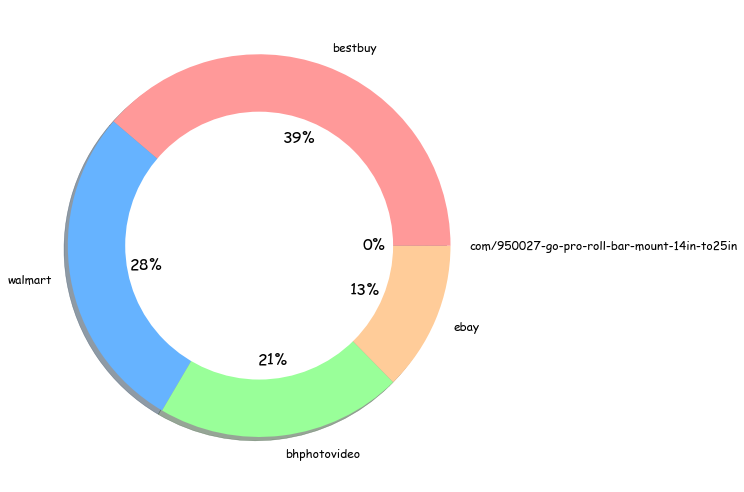

In [37]:
df1=df.marchant_name.value_counts().reset_index()
labels= df1['index']
data=df1['marchant_name']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(data, labels = labels, autopct='%.0f%%',shadow=True, colors=colors)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

<div class="alert alert-block alert-success"><b>insight: </b>most of the products come from bestbuy then walmart</div>

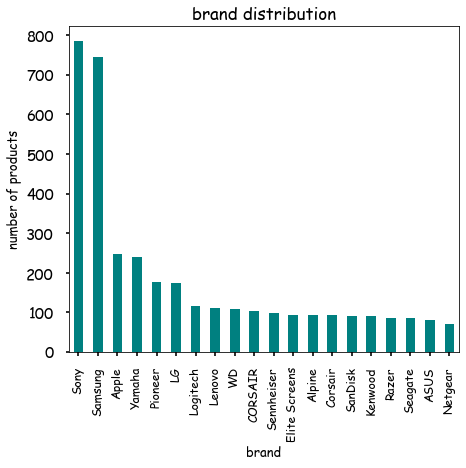

In [38]:
plt.figure(figsize = (7,6))
top_20_brand = df['brand'].value_counts()
top_20_brand[:20].plot(kind='bar',color='teal')
plt.title('brand distribution')
plt.xlabel('brand')
plt.ylabel('number of products')
plt.show()

<div class="alert alert-block alert-success"><b>insight: </b>top 20 brand has been shown. *** 1st -sony, 2nd-samsung, 3rd-apple</div>

In [39]:
bestbuy_df = df[df['marchant_name'] == 'bestbuy']
walmart_df = df[df['marchant_name'] == 'walmart']
ebay_df = df[df['marchant_name'] == 'ebay']
bhphotovideo_df = df[df['marchant_name'] =='bhphotovideo']

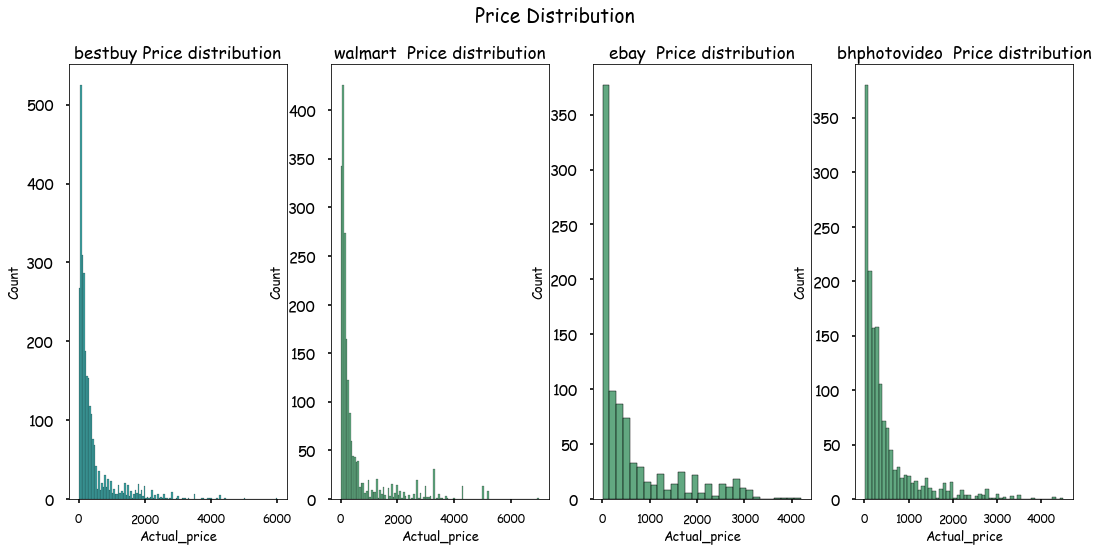

In [40]:
fig, axes = plt.subplots(1, 4, figsize=(18, 8))
fig.suptitle('Price Distribution')
axes[0].set_title('bestbuy Price distribution')
axes[1].set_title('walmart  Price distribution')
axes[2].set_title('ebay  Price distribution')
axes[3].set_title('bhphotovideo  Price distribution')

sns.histplot(ax= axes[0],data = bestbuy_df['Actual_price'],color='teal')
sns.histplot(ax= axes[1],data = walmart_df['Actual_price'],color='seagreen')
sns.histplot(ax= axes[2],data = ebay_df['Actual_price'],color='seagreen')
sns.histplot(ax= axes[3],data = bhphotovideo_df['Actual_price'], color='seagreen')
plt.show()

<div class="alert alert-block alert-success"><b>insight: </b>Above charts shows that Actual price is bit left skewed but overall maximum ranges within $2000USD.Also walmart has the height price range & it has more products with lower price.</div>

In [41]:
New_df = df[df['condition'] == 'New']
used_df = df[df['condition'] == 'Used']
Refurbished_df = df[df['condition'] == 'Refurbished']

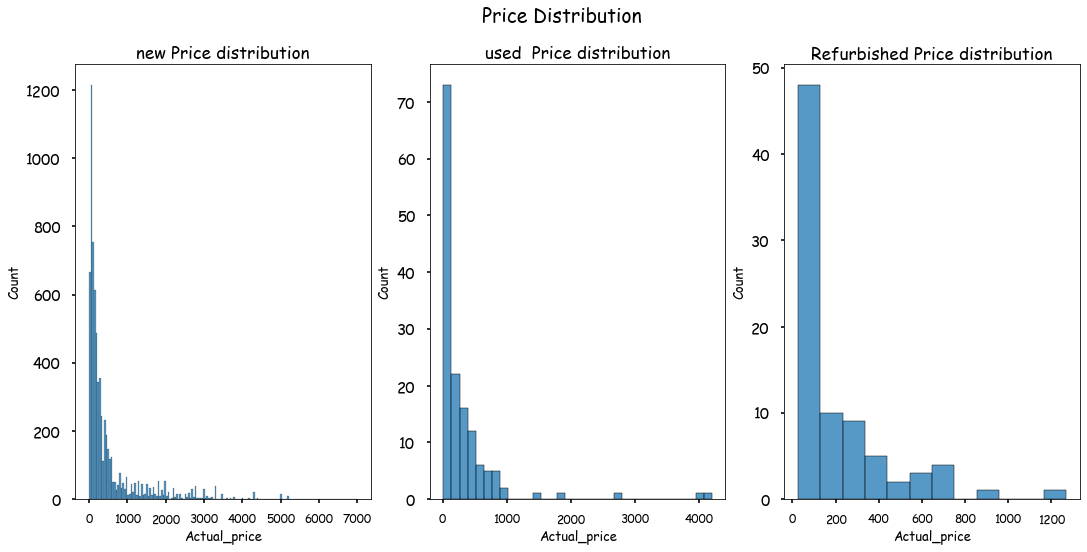

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(18, 8))
sns.color_palette("crest", as_cmap=True)
fig.suptitle('Price Distribution')
axes[0].set_title('new Price distribution')
axes[1].set_title('used  Price distribution')
axes[2].set_title('Refurbished Price distribution')
sns.histplot(ax= axes[0],data = New_df['Actual_price'])
sns.histplot(ax= axes[1],data = used_df['Actual_price'])
sns.histplot(ax= axes[2],data = Refurbished_df['Actual_price'],palette="flare")
plt.show()

<div class="alert alert-block alert-success"><b>insight: </b>These charts shows price distribution for new, used and refurbised products.for new products prices are heighst. for refurbished products prices are lower than used products</div>

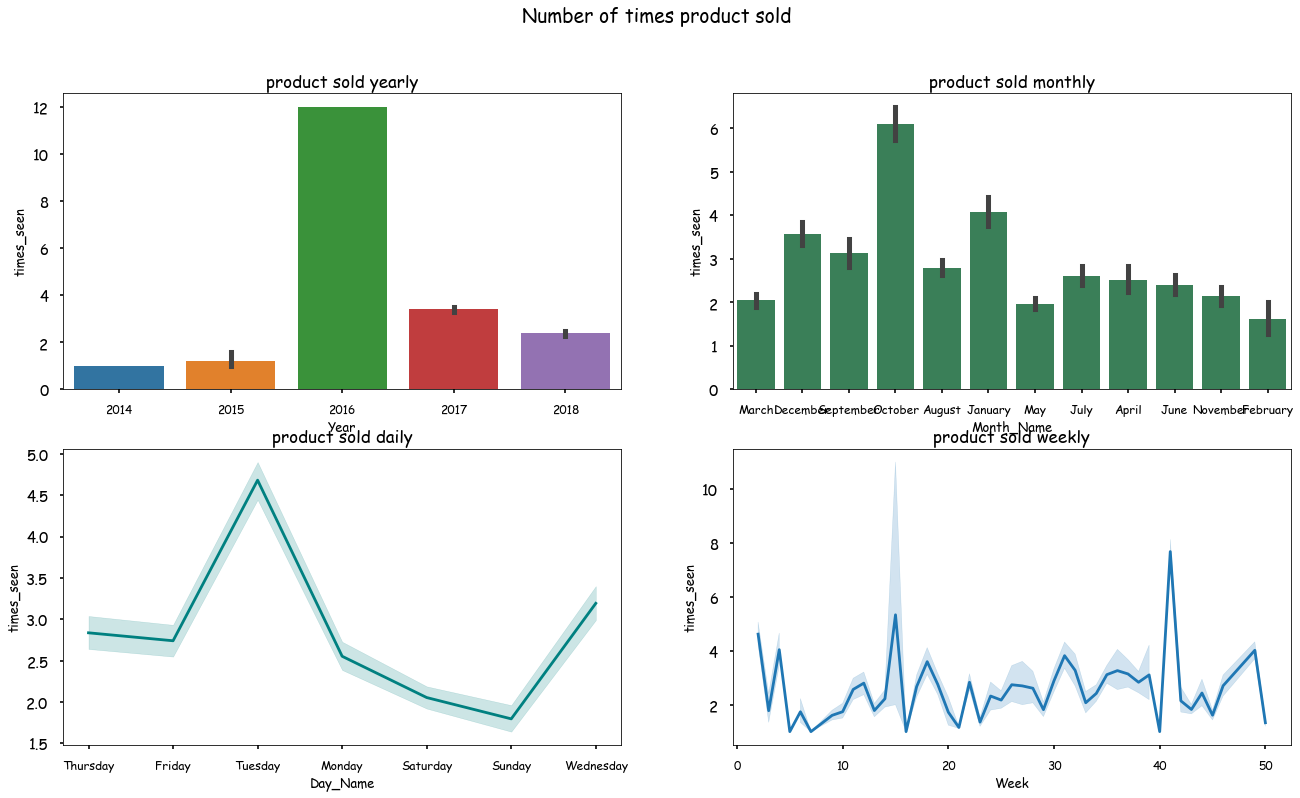

In [43]:
fig, axes = plt.subplots(2, 2, figsize=(22, 12))
fig.suptitle('Number of times product sold')
axes[0,0].set_title('product sold yearly')
axes[0,1].set_title('product sold monthly')
axes[1,0].set_title('product sold daily')
axes[1,1].set_title('product sold weekly')
sns.barplot(ax=axes[0, 0], data=df, y='times_seen', x='Year')
sns.barplot(ax=axes[0, 1], data=df, y='times_seen', x='Month_Name',color='seagreen')
sns.lineplot(ax=axes[1, 0], data=df, y='times_seen',x='Day_Name', color='teal')
sns.lineplot(ax=axes[1, 1], data=df, y='times_seen', x='Week')
plt.show()

<div class="alert alert-block alert-success"><b>insight: </b>tuesday is the day where people buy more products. 2016 is the where there </div>

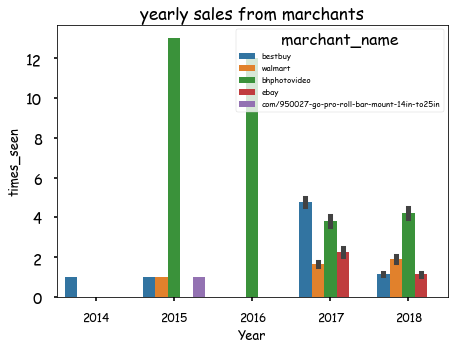

In [44]:
plt.figure(figsize = (7,5))
sns.barplot(data=df, x='Year', y="times_seen", hue="marchant_name")
plt.title('yearly sales from marchants')
plt.show()

<div class="alert alert-block alert-success"><b>insight: </b>..</div>

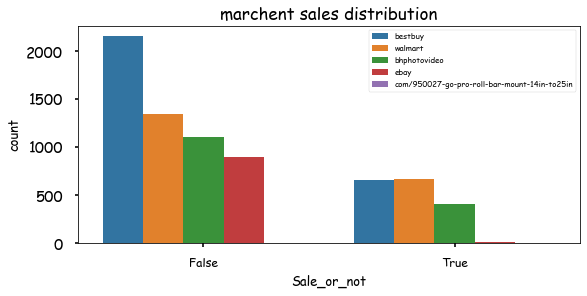

In [45]:
plt.figure(figsize = (9,4))
sns.countplot(data=df,x='Sale_or_not',hue='marchant_name')
plt.title('marchent sales distribution')
plt.legend(loc='upper right')
plt.show()

<div class="alert alert-block alert-success"><b>insight: </b>. </div>

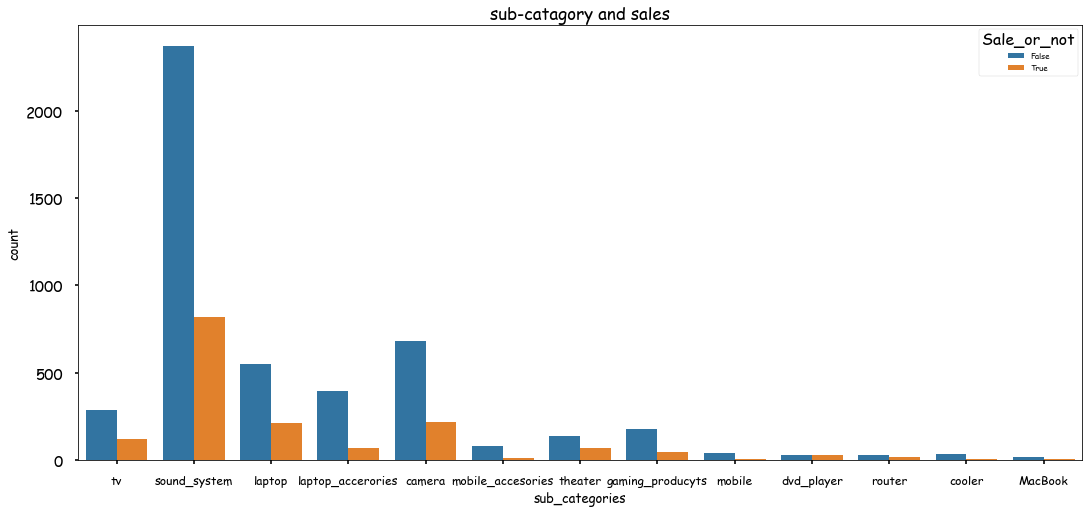

In [46]:
plt.figure(figsize = (18,8))
sns.countplot(data=df, x='sub_categories', hue='Sale_or_not')
plt.title('sub-catagory and sales')
plt.show()

<div class="alert alert-block alert-success"><b>insight: </b>. </div>

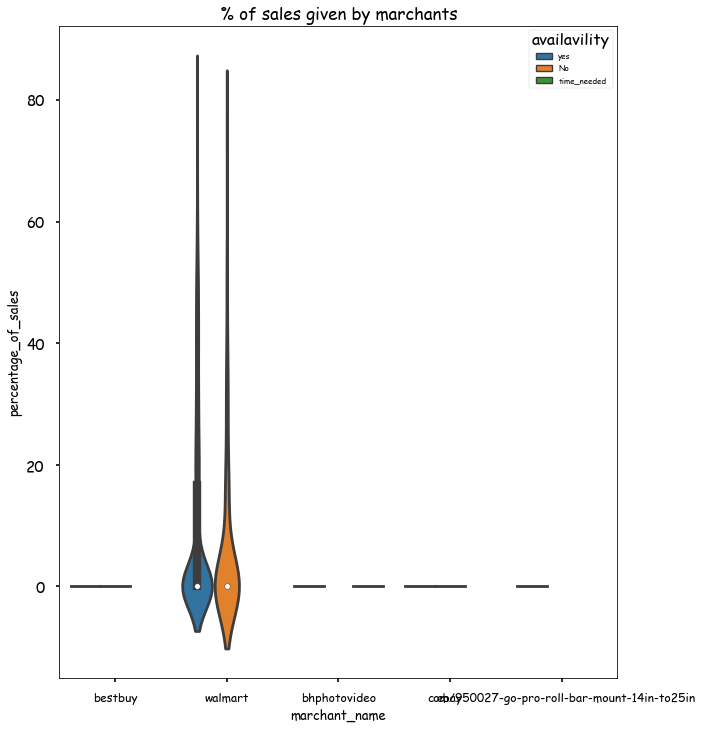

In [47]:
plt.figure(figsize = (10,12))
sns.violinplot(data=df, x='marchant_name', y="percentage_of_sales", hue="availavility")
plt.title('% of sales given by marchants')
plt.show()

<div class="alert alert-block alert-success"><b>insight: </b>. </div>

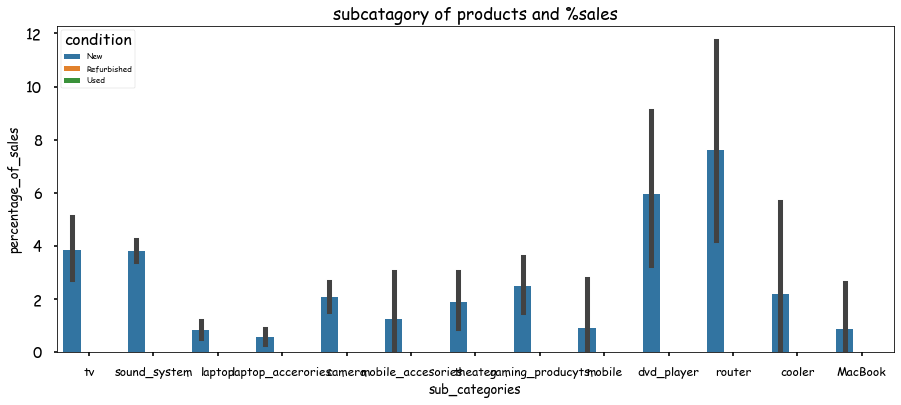

In [48]:
plt.figure(figsize = (15,6))
sns.barplot(data=df, x='sub_categories' , y= 'percentage_of_sales', hue='condition')
plt.title('subcatagory of products and %sales')
plt.show()

<div class="alert alert-block alert-success"><b>insight: </b>. </div>

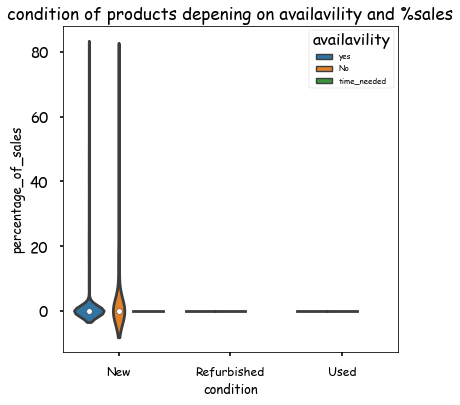

In [49]:
plt.figure(figsize = (6,6))
sns.violinplot(data=df, x='condition', y="percentage_of_sales", hue="availavility")
plt.title('condition of products depening on availavility and %sales')
plt.show()

<div class="alert alert-block alert-success"><b>insight: </b>. </div>

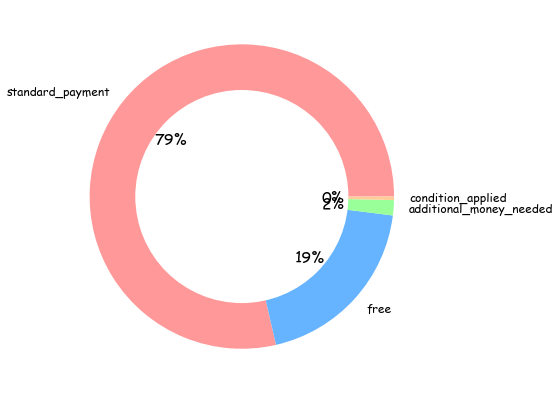

In [50]:
plt.figure(figsize = (7,7))
df3=df.shipping_price.value_counts().reset_index()
labels= df3['index']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
data=df3['shipping_price']
plt.pie(data, labels = labels, autopct='%.0f%%',colors=colors)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

<div class="alert alert-block alert-success"><b>insight: </b>. </div>

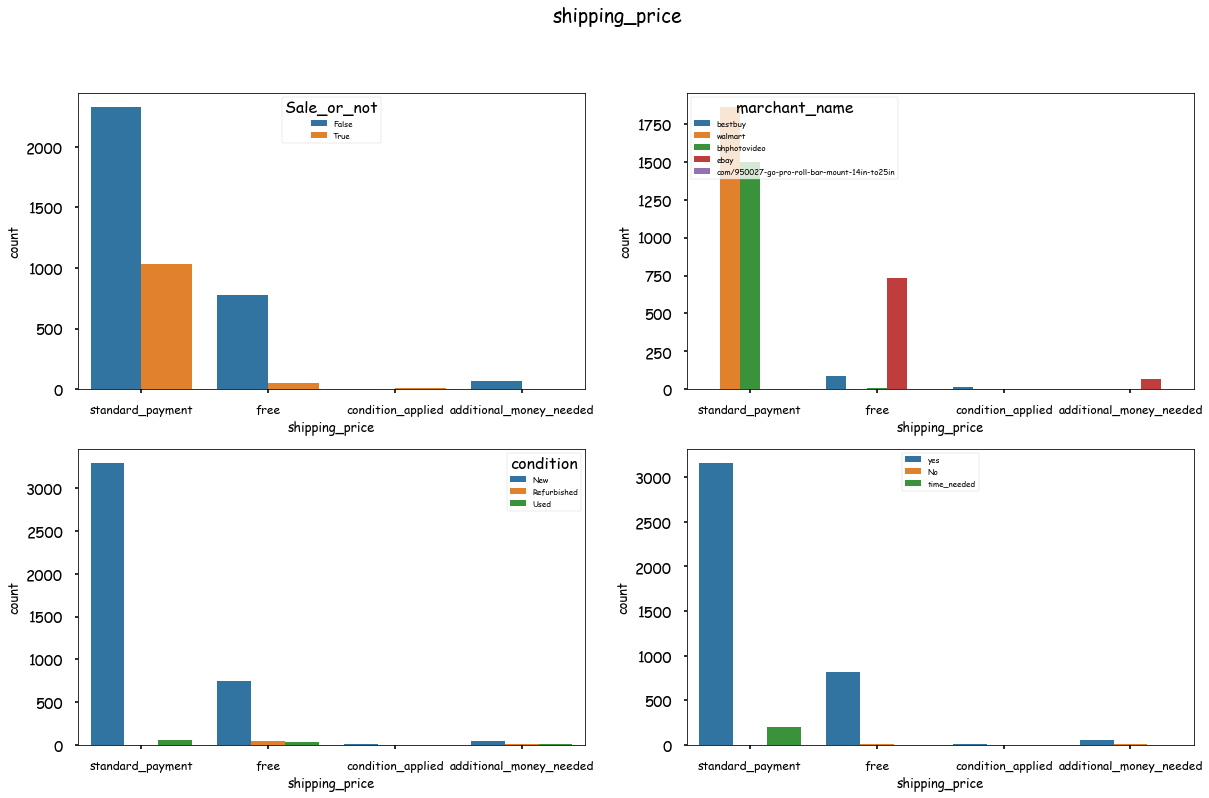

In [51]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('shipping_price')
sns.countplot(ax=axes[0, 0], data=df, x='shipping_price',hue='Sale_or_not')
sns.countplot(ax=axes[0, 1], data=df, x='shipping_price',hue='marchant_name')
sns.countplot(ax=axes[1, 0], data=df, x='shipping_price',hue='condition')
sns.countplot(ax=axes[1, 1], data=df, x='shipping_price',hue='availavility')
plt.legend(loc='upper center')
plt.show()


<div class="alert alert-block alert-success"><b>insight: </b>. </div>

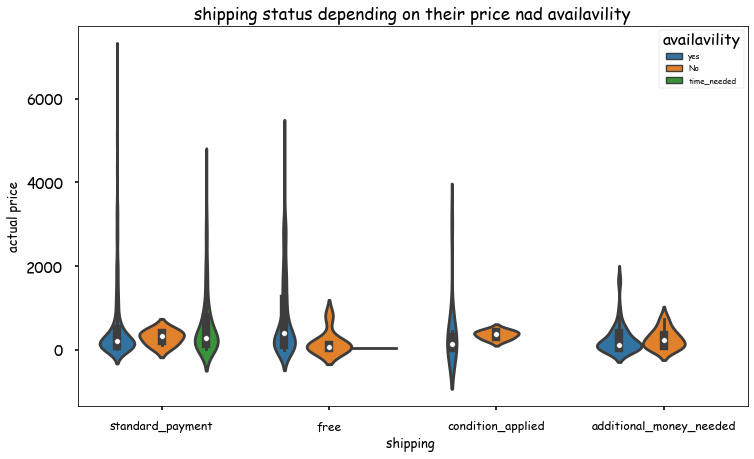

In [52]:
plt.figure(figsize = (12,7))
sns.violinplot(data=df, x='shipping_price', y="Actual_price", hue="availavility")
plt.title('shipping status depending on their price nad availavility')
plt.xlabel('shipping ')
plt.ylabel('actual price')
plt.show()

<div class="alert alert-block alert-success"><b>insight: </b>. </div>


<a id="clean2"></a>
<h2>   
      <font color = green >
            <span style='font-family:Georgia'>
            Conclusion
            </span>   
        </font>    
</h2>

<div class="alert alert-block alert-success"><b>insight: </b>. </div>

*** 
---
___